In [10]:
import numpy as np
import base64
import os
from os.path import join
import sys

def mprint(msg):
    from datetime import datetime
    """info"""
    cur_time = datetime.now().strftime('%m-%d %H:%M:%S')
    print(f"INFO  [{cur_time}] {msg}")

def Config_DIRS():

    if len(sys.argv) == 1:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'program': join(ROOT_DIR, 'ingestion_program'),
            'submission': join(ROOT_DIR, 'automl')
        }
    elif len(sys.argv) == 3:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'program': join(ROOT_DIR, 'ingestion_program'),
            'submission': join(ROOT_DIR, 'automl')
        }

    elif len(sys.argv) == 5:
        # run in codalab
        DIRS = {
            'input': sys.argv[1],
            'output': sys.argv[2],
            'program': sys.argv[3],
            'submission': sys.argv[4]
        }
    elif len(sys.argv) == 6 and sys.argv[1] == 'local':
        # full call in local
        DIRS = {
            'input': sys.argv[2],
            'output': sys.argv[3],
            'program': sys.argv[4],
            'submission': sys.argv[5]
        }
    else:
        raise ValueError("Wrong number of arguments")
    sys.path.append(DIRS['submission'])
    print(DIRS)
    return(DIRS)

DIRS = Config_DIRS()

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from util import dump_result,load_result
from plot import plot_bar,transfer_GP_to_table,transfer_RF_to_table,plot_line

{'input': 'D:\\caicai\\result_output\\MasterThesis_Automl-master\\MasterThesis_Automl\\data', 'output': 'D:\\caicai\\result_output\\MasterThesis_Automl-master\\MasterThesis_Automl\\predictions', 'program': 'D:\\caicai\\result_output\\MasterThesis_Automl-master\\MasterThesis_Automl\\ingestion_program', 'submission': 'D:\\caicai\\result_output\\MasterThesis_Automl-master\\MasterThesis_Automl\\automl'}


In [11]:
# initial name of dataset
dataset = "dataset_24_mushroom"

#load dumped results
RM_results =load_result(dataset+"_randomsearch2models_100.json")
rm_10_score_summary= load_result(dataset+"_rm_50_score_summary2model_100.json")

BO_no_parallel = load_result(dataset+"_results_without_parallel_100.json")
BO_results = load_result(dataset+"_results_with_parallel_100.json")
BO_rm_results = load_result(dataset+"_results_with_parallel_random.json")

BO_model_parallel = load_result(dataset+"_results_with_model_bo_parallel.json")

#prepared related table
rm=rm_10_score_summary.sort_values(by="mean_score" , ascending=True) 
bo_gp = transfer_GP_to_table(BO_results)
bo_rf = transfer_RF_to_table(BO_results)

bo_nopa_gp = transfer_GP_to_table(BO_no_parallel)
bo_nopa_rf = transfer_RF_to_table(BO_no_parallel)

bo_mpa_gp = transfer_GP_to_table(BO_model_parallel)
bo_mpa_rf = transfer_RF_to_table(BO_model_parallel)

bo_rm_gp = transfer_GP_to_table(BO_rm_results)
bo_rm_rf = transfer_RF_to_table(BO_rm_results)


# Result of different n points strategy

In [12]:
# summary tabel
rm_cpu_time = RM_results["LGBMClassifier"]["CPU_Time"]+RM_results["SVC"]["CPU_Time"]
bo_gp_cpu_time = BO_results["GP"]['CPU_Time']
bo_rf_cpu_time = BO_results["RF"]['CPU_Time']
bo_rm_gp_cpu_time = BO_rm_results["GP"]['CPU_Time']
bo_rm_rf_cpu_time = BO_rm_results["RF"]['CPU_Time']

rm_clock_time = round(sum(RM_results['LGBMClassifier']['CV']['mean_fit_time'] + RM_results['LGBMClassifier']['CV']['mean_score_time']+RM_results['SVC']['CV']['mean_fit_time'] + RM_results['SVC']['CV']['mean_score_time']),1)
bo_gp_clock_time = BO_results["GP"]['Time_cost']
bo_rf_clock_time = BO_results["RF"]['Time_cost']
bo_rm_gp_clock_time = BO_rm_results["GP"]['Time_cost']
bo_rm_rf_clock_time = BO_rm_results["RF"]['Time_cost']

rm_best_score = round(RM_results["LGBMClassifier"]['best_score'], 4)
bo_gp_best_score = round(BO_results["GP"]['best_score'], 4)
bo_rf_best_score = round(BO_results["RF"]['best_score'], 4)

bo_rm_gp_best_score = round(BO_rm_results["GP"]['best_score'], 4)
bo_rm_rf_best_score = round(BO_rm_results["RF"]['best_score'], 4)


summary1 = pd.DataFrame(columns = ["dataset","strategy","best_score","cpu_time","clock_time"])
summary1["dataset"]=[dataset,dataset,dataset]
summary1["strategy"]=["randomsearch",'parallel_BO','parallel_BO+random']
summary1["best_score"]=[rm_best_score,max(bo_gp_best_score,bo_rf_best_score),max(bo_rm_gp_best_score,bo_rm_rf_best_score)]
summary1["cpu_time"]=[rm_cpu_time,bo_gp_cpu_time+bo_rf_cpu_time,bo_rm_gp_cpu_time+bo_rm_rf_cpu_time]
summary1["clock_time"]=[rm_clock_time,bo_gp_clock_time+bo_rf_clock_time,bo_rm_gp_clock_time+bo_rm_rf_clock_time]
summary1.sort_values("best_score",ascending=False)

,dataset,strategy,best_score,cpu_time,clock_time
0,dataset_24_mushroom,randomsearch,1.0,15.0,176.7
1,dataset_24_mushroom,parallel_BO,1.0,1004.0,535.0
2,dataset_24_mushroom,parallel_BO+random,1.0,721.0,424.0


Random Search best Score: 1.0 with 200 iterations
BO         GP best Score: 1.0 with 200 iterations
BO         RF best Score: 1.0 with 200 iterations
BO+Random         GP best Score: 1.0 with 200 iterations
BO+Random         RF best Score: 1.0 with 200 iterations


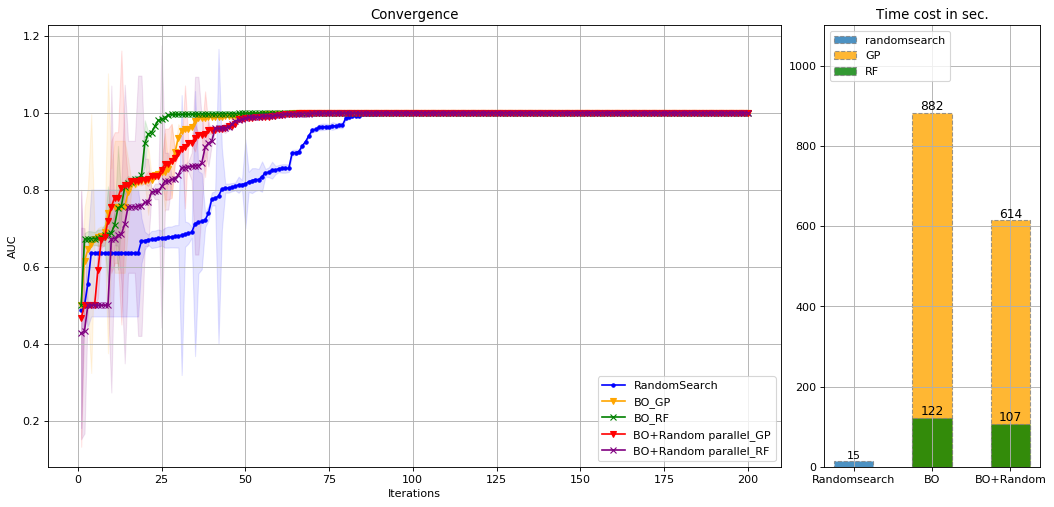

In [22]:
#plt.rcParams["figure.figsize"] = (20, 6)
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = gridspec.GridSpec(4, 4, hspace=0.4, wspace=0.2)
main = fig.add_subplot(grid[:-1, :-1])
#bottom = fig.add_subplot(grid[-1,0:-1])
right = fig.add_subplot(grid[:-1, -1])

#ax0 = fig.add_subplot(211)
ax0 = main
ax0.plot(range(1, len(rm)+1), rm["mean_score"],
         label="RandomSearch", color='b', marker=".", markersize=6)
r1 = list(map(lambda x: x[0]-x[1], zip(rm["mean_score"], rm["std_score"])))
r2 = list(map(lambda x: x[0]+x[1], zip(rm["mean_score"], rm["std_score"])))
ax0.fill_between(range(1, len(rm)+1), r1, r2, color='b', alpha=0.1)

# BO
plot_line(ax0, BO_results, bo_gp, bo_rf, color=["orange", "g"], labelname="BO")
plot_line(ax0, BO_rm_results, bo_rm_gp, bo_rm_rf, color=[
          "r", "purple"], labelname="BO+Random parallel")

#ax0.set_ylim((0.6, 0.7))
ax0.set_xlabel('Iterations')
ax0.set_ylabel('AUC')
ax0.set_title('Convergence')
ax0.legend(loc=4)
ax0.grid()

#ax1 = fig.add_subplot(212)
ax1 = right
rm_time = rm_cpu_time
ax1.bar("Randomsearch", rm_time, label="Randomsearch",
        width=0.5, alpha=0.8, ec='grey', ls="--")
# ax1.axes.get_yaxis().set_visible(False)
ax1.text("Randomsearch", rm_time + 0.05, '%.0f' %
         rm_time, ha='center', va='bottom', fontsize=10)
print("Random Search"+' best Score:',
      round(RM_results["LGBMClassifier"]['best_score'], 4), 'with', len(rm), 'iterations')

plot_bar(ax1, BO_results, "BO")
plot_bar(ax1, BO_rm_results, "BO+Random")

# data = [list(summary1["cpu_time"]),
#        [None,bo_gp_cpu_time,bo_rm_gp_cpu_time],
#        [None,bo_rf_cpu_time,bo_rm_rf_cpu_time],
#        list(summary1["best_score"])
# ]
#cols = ("RandomSearch","BO","BO+Random")
#rows = ["total_cpu_time","GP_cpu_time","RF_cpu_time","best_score"]
# ax1.table(cellText=data,
#         rowLabels=rows,
#         colLabels=cols,
#         loc="bottom")
ax1.set_title('Time cost in sec.')
#ax1.set_ylabel('Time cost in sec.')
ax1.set_ylim((0, 1100))
ax1.legend(["randomsearch", "GP", "RF"], loc=2)
ax1.grid()
plt.tight_layout()

# Result of different parallel strategy

In [14]:

rm_cpu_time = RM_results["LGBMClassifier"]["CPU_Time"]+RM_results["SVC"]["CPU_Time"]
bo_gp_cpu_time = BO_results["GP"]['CPU_Time']
bo_rf_cpu_time = BO_results["RF"]['CPU_Time']
bo_nopa_gp_cpu_time = BO_no_parallel["GP"]['CPU_Time']
bo_nopa_rf_cpu_time = BO_no_parallel["RF"]['CPU_Time']
mopa_gp_cpu_time = BO_model_parallel["GP"]['CPU_Time']
mopa_rf_cpu_time = BO_model_parallel["RF"]['CPU_Time']


rm_clock_time = RM_results["LGBMClassifier"]["Time_cost"]+RM_results["SVC"]["Time_cost"]
bo_gp_clock_time = BO_results["GP"]['Time_cost']
bo_rf_clock_time = BO_results["RF"]['Time_cost']
bo_nopa_gp_clock_time = BO_no_parallel["GP"]['Time_cost']
bo_nopa_rf_clock_time = BO_no_parallel["RF"]['Time_cost']
mopa_gp_clock_time = BO_model_parallel["GP"]['Time_cost']
mopa_rf_clock_time = BO_model_parallel["RF"]['Time_cost']

rm_best_score = round(RM_results["LGBMClassifier"]['best_score'], 4)
bo_gp_best_score = round(BO_results["GP"]['best_score'], 4)
bo_rf_best_score = round(BO_results["RF"]['best_score'], 4)
bo_nopa_gp_best_score = round(BO_no_parallel["GP"]['best_score'], 4)
bo_nopa_rf_best_score = round(BO_no_parallel["RF"]['best_score'], 4)
mopa_gp_best_score = round(BO_model_parallel["GP"]['best_score'], 4)
mopa_rf_best_score = round(BO_model_parallel["RF"]['best_score'], 4)


summary2 = pd.DataFrame(columns = ["dataset","strategy","best_score","cpu_time","clock_time"])
summary2["dataset"]=[dataset,dataset,dataset,dataset]
summary2["strategy"]=["randomsearch",
                      'parallel_BO',
                      'no_parallel_BO+random',
                      "model_parallel",
                      ]
summary2["best_score"]=[rm_best_score,
                        max(bo_gp_best_score,bo_rf_best_score),
                        max(bo_nopa_gp_best_score,bo_nopa_rf_best_score),
                        max(mopa_gp_best_score,mopa_rf_best_score)]
summary2["cpu_time"]=[rm_cpu_time,
                       bo_gp_cpu_time + bo_rf_cpu_time,
                       bo_nopa_gp_cpu_time + bo_nopa_rf_cpu_time,
                       mopa_gp_clock_time + mopa_rf_clock_time]
summary2["clock_time"]=[rm_clock_time,bo_gp_clock_time+bo_rf_clock_time,bo_nopa_gp_clock_time+bo_nopa_rf_clock_time,mopa_gp_clock_time+mopa_rf_clock_time]
summary2.sort_values("best_score",ascending=False)


,dataset,strategy,best_score,cpu_time,clock_time
0,dataset_24_mushroom,randomsearch,1.0,15.0,117.0
1,dataset_24_mushroom,parallel_BO,1.0,1004.0,535.0
2,dataset_24_mushroom,no_parallel_BO+random,1.0,2708.0,698.0
3,dataset_24_mushroom,model_parallel,1.0,645.0,645.0


Random Search             best Score: 1.0 with 200 iterations
BO         GP best Score: 1.0 with 200 iterations
BO         RF best Score: 1.0 with 200 iterations
BO without parallel         GP best Score: 1.0 with 200 iterations
BO without parallel         RF best Score: 1.0 with 200 iterations
BO modelparallel         GP best Score: 1.0 with 200 iterations
BO modelparallel         RF best Score: 1.0 with 200 iterations


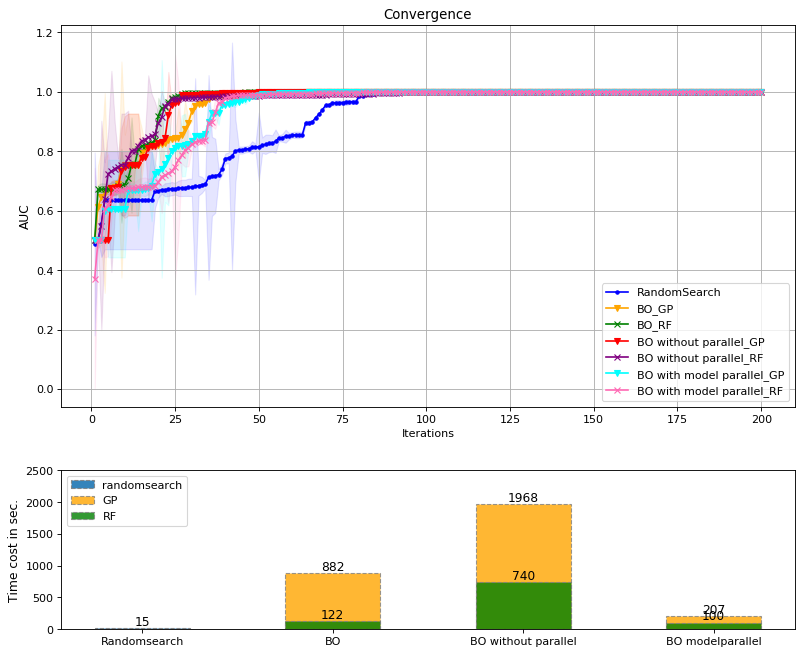

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from util import dump_result,load_result

fig = plt.figure(figsize=(16,10),dpi = 80)
grid = gridspec.GridSpec(3, 4, hspace=0.4,wspace=0.2)
main = fig.add_subplot(grid[:-1,:-1])
bottom = fig.add_subplot(grid[-1,0:-1])
#right = fig.add_subplot(grid[:-1, -1])

ax0 = main
#ax0 = fig.add_subplot(211)

#randomsearch
ax0.plot(range(1,len(rm)+1),rm["mean_score"],label="RandomSearch",color ='b',marker=".", markersize=6)
r1 = list(map(lambda x: x[0]-x[1], zip(rm["mean_score"], rm["std_score"])))
r2 = list(map(lambda x: x[0]+x[1], zip(rm["mean_score"], rm["std_score"])))
ax0.fill_between(range(1,len(rm)+1), r1, r2, color ='b',alpha=0.1)

#BO 
plot_line(ax0,BO_results,bo_gp,bo_rf,color=["orange","g"],labelname="BO")
plot_line(ax0,BO_no_parallel,bo_nopa_gp,bo_nopa_rf,color=["r","purple"],labelname="BO without parallel")
plot_line(ax0,BO_model_parallel,bo_mpa_gp,bo_mpa_rf,color=["cyan","hotpink"],labelname="BO with model parallel")

#ax0.set_ylim((0.6, 0.7))
ax0.set_xlabel('Iterations')
ax0.set_ylabel('AUC', fontsize=11)
ax0.set_title('Convergence')
ax0.legend(loc=4)
ax0.grid()

#ax1 = fig.add_subplot(212)
ax1 = bottom

rm_time = RM_results["LGBMClassifier"]["CPU_Time"]+RM_results["SVC"]["CPU_Time"]
ax1.bar("Randomsearch", rm_time, label="Randomsearch", width=0.5, alpha=0.9, ec='grey', ls="--")
ax1.text("Randomsearch", rm_time + 0.05, '%.0f' % rm_time, ha='center', va='bottom', fontsize=11)
print( "Random Search            "+' best Score:', round(RM_results["LGBMClassifier"]['best_score'], 4), 'with', len(rm), 'iterations')

plot_bar(ax1,BO_results,"BO")
plot_bar(ax1,BO_no_parallel,"BO without parallel")
plot_bar(ax1,BO_model_parallel,"BO modelparallel")
ax1.set_ylim((0, 2500))
ax1.set_ylabel("Time cost in sec.", fontsize=11)
ax1.legend( ["randomsearch","GP","RF"],loc=2)
plt.tight_layout()

Random Search             best Score: 1.0 with 200 iterations
BO with parallel GP       best Score: 1.0 with 200 iterations
BO with parallel RF       best Score: 1.0 with 200 iterations
BO without parallel GP    best Score: 1.0 with 200 iterations
BO without parallel RF    best Score: 1.0 with 200 iterations
BO with model parallel GP best Score: 1.0 with 200 iterations
BO with model parallel RF best Score: 1.0 with 200 iterations


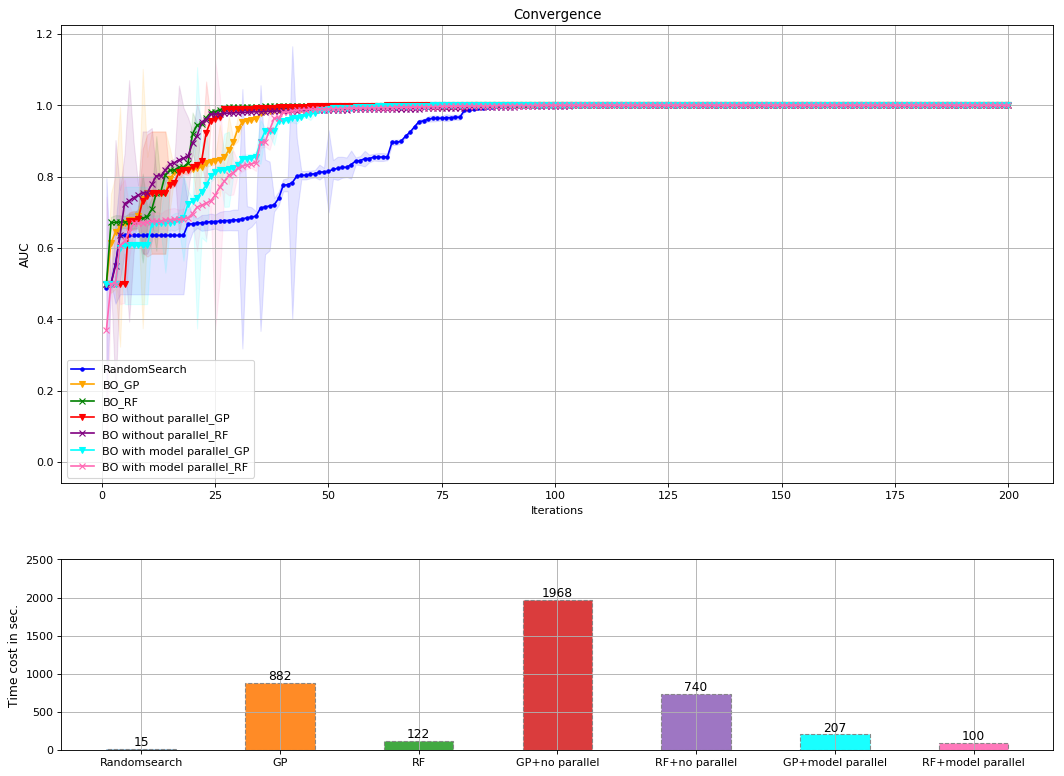

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from util import dump_result,load_result


#plt.rcParams["figure.figsize"] = (15, 8)
fig = plt.figure(figsize=(16,12),dpi = 80)
grid = gridspec.GridSpec(3, 4, hspace=0.4,wspace=0.2)
main = fig.add_subplot(grid[:-1,:])
bottom = fig.add_subplot(grid[-1,0:])

#ax0 = plt.subplot(gs[0])
ax0 = main
#ax0 = fig.add_subplot(211)
#randomsearch
ax0.plot(range(1,len(rm)+1),rm["mean_score"],label="RandomSearch",color ='b',marker=".", markersize=6)
r1 = list(map(lambda x: x[0]-x[1], zip(rm["mean_score"], rm["std_score"])))
r2 = list(map(lambda x: x[0]+x[1], zip(rm["mean_score"], rm["std_score"])))
ax0.fill_between(range(1,len(rm)+1), r1, r2, color ='b',alpha=0.1)

#BO 
plot_line(ax0,BO_results,bo_gp,bo_rf,color=["orange","g"],labelname="BO")
plot_line(ax0,BO_no_parallel,bo_nopa_gp,bo_nopa_rf,color=["r","purple"],labelname="BO without parallel")
plot_line(ax0,BO_model_parallel,bo_mpa_gp,bo_mpa_rf,color=["cyan","hotpink"],labelname="BO with model parallel")

#ax0.set_ylim((0.6, 0.7))
ax0.set_xlabel('Iterations')
ax0.set_ylabel('AUC', fontsize=11)
ax0.set_title('Convergence')
ax0.legend()
ax0.grid()

ax1 = bottom
#ax1 = fig.add_subplot(212)

rm_time = RM_results["LGBMClassifier"]["CPU_Time"]+RM_results["SVC"]["CPU_Time"]
ax1.bar("Randomsearch", rm_time, label="Randomsearch", width=0.5, alpha=0.9, ec='grey', ls="--")
ax1.text("Randomsearch", rm_time + 0.05, '%.0f' % rm_time, ha='center', va='bottom', fontsize=11)
print( "Random Search            "+' best Score:', round(RM_results["LGBMClassifier"]['best_score'], 4), 'with', len(rm), 'iterations')

for i  in BO_results.keys():
    time = BO_results[i]['CPU_Time']
    ax1.bar(i, time, width=0.5, alpha=0.9, ec='grey', ls="--")
    ax1.text(i, time + 0.05, '%.0f' % time, ha='center', va='bottom', fontsize=11)
    print( "BO with parallel "+i+'       best Score:', round(BO_results[i]['best_score'], 4), 'with', len(BO_results[i]['all_cv_results']), 'iterations')

for i  in BO_no_parallel.keys():
    time = BO_no_parallel[i]['CPU_Time']
    clock_time = BO_no_parallel[i]['Time_cost']
    ax1.bar(i+"+no parallel", time, width=0.5, alpha=0.9, ec='grey', ls="--")
    ax1.set_ylabel("Time cost in sec.")
    ax1.text(i+"+no parallel", time + 0.05, '%.0f' % time, ha='center', va='bottom', fontsize=11)
    print( "BO without parallel "+i+'    best Score:', round(BO_no_parallel[i]['best_score'], 4), 'with', len(BO_no_parallel[i]['all_cv_results']), 'iterations')

for i ,co in zip(BO_model_parallel.keys(),["cyan","hotpink"]):
    time = BO_model_parallel[i]['CPU_Time']
    clock_time = BO_model_parallel[i]['Time_cost']
    ax1.bar(i+"+model parallel", time, width=0.5, alpha=0.9, color=co,ec='grey', ls="--")
    ax1.set_ylabel("Time cost in sec.")
    ax1.text(i+"+model parallel", time + 0.05, '%.0f' % time, ha='center', va='bottom', fontsize=11)
    print( "BO with model parallel "+i+' best Score:', round(BO_model_parallel[i]['best_score'], 4), 'with', len(BO_model_parallel[i]['all_cv_results']), 'iterations')

ax1.set_ylabel("Time cost in sec.", fontsize=11)
ax1.set_ylim((0, 2500))
ax1.grid()

plt.tight_layout()